In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data_download/gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

122

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global city,sector 92,0.78,7722.0,1010.0,Super Built up area 1010(93.83 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),2,2,3,others,2.0,NaN,Aug 2025,"['Iris Broadway Mall', 'Pataudi Road', 'Dwarka Expressway', 'Royal Institute Of Science & Management', 'RPS International School', 'IMT Manesar', 'Aarvy Healthcare Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Sector 90']","['1 Fan', '1 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
974,0.85,600.0,Plot area 600(55.74 sq.m.)
772,1.60,2000.0,Super Built up area 2000(185.81 sq.m.)
572,0.75,1095.0,Plot area 1095(101.73 sq.m.)
2561,2.15,2095.0,Super Built up area 2095(194.63 sq.m.)
2223,0.86,2588.0,Super Built up area 2588(240.43 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1877 sq.ft. (174.38 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1302,1.90,flat,1942.0,Super Built up area 1942(180.42 sq.m.),1942.0,NaN,NaN
1101,1.83,flat,2290.0,Super Built up area 2290(212.75 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1750 sq.ft. (162.58 sq.m.),2290.0,2000.0,1750.0
3267,6.50,flat,2965.0,Super Built up area 2965(275.46 sq.m.),2965.0,NaN,NaN
1144,2.40,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
2093,0.95,flat,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up area: 940 sq.ft. (87.33 sq.m.)Carpet area: 845 sq.ft. (78.5 sq.m.),1385.0,940.0,845.0


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,0.89,house,477.0,Plot area 477(44.31 sq.m.),NaN,NaN,NaN
17,6.95,house,1800.0,Plot area 192(160.54 sq.m.),NaN,NaN,NaN
25,4.00,house,2499.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
26,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
38,9.50,house,4050.0,Plot area 502(419.74 sq.m.)Built Up area: 500 sq.yards (418.06 sq.m.)Carpet area: 450 sq.yards (376.26 sq.m.),NaN,500.0,450.0


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          980
features                635
super_built_up_area    1887
built_up_area          2615
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,0.89,house,477.0,Plot area 477(44.31 sq.m.),NaN,NaN,NaN
17,6.95,house,1800.0,Plot area 192(160.54 sq.m.),NaN,NaN,NaN
25,4.00,house,2499.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
26,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
40,18.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


In [19]:
# Function to extract plot area from 'areaWithType' column 
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)
# plot area for houses is similar to built up area

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,0.89,house,477.0,Plot area 477(44.31 sq.m.),NaN,477.00,NaN
17,6.95,house,1800.0,Plot area 192(160.54 sq.m.),NaN,192.00,NaN
25,4.00,house,2499.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
26,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
40,18.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
41,1.20,house,538.0,Plot area 50,NaN,50.00,NaN
46,3.50,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
73,0.59,house,585.0,Plot area 585(54.35 sq.m.),NaN,585.00,NaN
76,4.00,house,1503.0,Plot area 167(139.63 sq.m.),NaN,167.00,NaN
79,6.50,house,3456.0,Plot area 384(321.07 sq.m.),NaN,384.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:          # 9* sqyd = sqft
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:       # 10.7 * sqm = sqft
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,0.89,house,477.0,Plot area 477(44.31 sq.m.),NaN,477.00,NaN
17,6.95,house,1800.0,Plot area 192(160.54 sq.m.),NaN,1728.00,NaN
25,4.00,house,2499.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
26,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
40,18.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,4500.00,NaN
41,1.20,house,538.0,Plot area 50,NaN,535.00,NaN
46,3.50,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.00,NaN
73,0.59,house,585.0,Plot area 585(54.35 sq.m.),NaN,585.00,NaN
76,4.00,house,1503.0,Plot area 167(139.63 sq.m.),NaN,1503.00,NaN
79,6.50,house,3456.0,Plot area 384(321.07 sq.m.),NaN,3456.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          980
features                635
super_built_up_area    1887
built_up_area          2069
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global city,sector 92,0.78,7722.0,1010.0,Super Built up area 1010(93.83 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),2,2,3,others,2.0,NaN,Aug 2025,"['Iris Broadway Mall', 'Pataudi Road', 'Dwarka Expressway', 'Royal Institute Of Science & Management', 'RPS International School', 'IMT Manesar', 'Aarvy Healthcare Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Sector 90']","['1 Fan', '1 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",1010.0,NaN,700.0
1,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,servant room,10.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['5 Fan', '5 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",2191.0,NaN,NaN
2,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet area: 3156 sq.ft. (293.2 sq.m.),3,4,3+,"servant room,pooja room",3.0,North-East,10+ Year Old,"['Micromax moulsari avenue metro station', 'Indusind bank cyber city metro station', 'Dlf phase 3 metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Citibank ATM', 'Icici bank ATM', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Garg Dental Care', 'R.N Clinic', 'Shri Ram Memorial Hospital', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Darpan Skin & Mind Clinic', 'DGD Rajokari', 'Relief Physiotherapy Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Cosmodentz Dental Clinic', 'Upkar Clinic', 'Pharmacy', 'Shri Balaji Medical Store', 'SP Infocity', 'PVR Cinames', 'State bank of india', 'Deutsche bank', 'Icici bank', 'Icici bank', 'Standard chartered bank', 'Machaan', 'barrique', 'The God Father', 'Food Court', 'Mc Donalds', ""McDonald's"", 'Cantine', 'Mukesh Dhaba']","['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Modular Kitchen', '5 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",3200.0,NaN,3156.0
3,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not available,4.0,North,0 to 1 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Park Hospita

## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1586
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1203,"pooja room,servant room",0,1,0,1,0
1661,servant room,0,1,0,0,0
3793,servant room,0,1,0,0,0
1740,servant room,0,1,0,0,0
3423,study room,1,0,0,0,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global city,sector 92,0.78,7722.0,1010.0,Super Built up area 1010(93.83 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),2,2,3,others,2.0,NaN,Aug 2025,"['Iris Broadway Mall', 'Pataudi Road', 'Dwarka Expressway', 'Royal Institute Of Science & Management', 'RPS International School', 'IMT Manesar', 'Aarvy Healthcare Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Sector 90']","['1 Fan', '1 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",1010.0,NaN,700.0,0,0,0,0,1
1,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,servant room,10.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['5 Fan', '5 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",2191.0,NaN,NaN,0,1,0,0,0
2,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet area: 3156 sq.ft. (293.2 sq.m.),3,4,3+,"servant room,pooja room",3.0,North-East,10+ Year Old,"['Micromax moulsari avenue metro station', 'Indusind bank cyber city metro station', 'Dlf phase 3 metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Citibank ATM', 'Icici bank ATM', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Garg Dental Care', 'R.N Clinic', 'Shri Ram Memorial Hospital', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Darpan Skin & Mind Clinic', 'DGD Rajokari', 'Relief Physiotherapy Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Cosmodentz Dental Clinic', 'Upkar Clinic', 'Pharmacy', 'Shri Balaji Medical Store', 'SP Infocity', 'PVR Cinames', 'State bank of india', 'Deutsche bank', 'Icici bank', 'Icici bank', 'Standard chartered bank', 'Machaan', 'barrique', 'The God Father', 'Food Court', 'Mc Donalds', ""McDonald's"", 'Cantine', 'Mukesh Dhaba']","['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Modular Kitchen', '5 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",3200.0,NaN,3156.0,0,1,0,1,0
3,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not available,4.

## 3.agePossession

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      89
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Dec 2025                 7
Jun 2024                 7
Aug 2023                 7
Nov 2023                 5
By 2025                  4
Sep 2023                 4
Oct 2023                 4
Aug 2024                 4
Jul 2024                 4
Nov 2024                 3
May 2024                 3
Feb 2024                 3
Jan 2025                 3
Jul 2027                 2
Mar 2025                 2
Oct 2025                 2
Jun 2027                 2
By 2027                  2
Aug 2025                 2
Apr 2026                 2
Jan 2026                 2
Jul 2025      

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     282
Name: count, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global city,sector 92,0.78,7722.0,1010.0,Super Built up area 1010(93.83 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),2,2,3,others,2.0,NaN,Under Construction,"['Iris Broadway Mall', 'Pataudi Road', 'Dwarka Expressway', 'Royal Institute Of Science & Management', 'RPS International School', 'IMT Manesar', 'Aarvy Healthcare Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Sector 90']","['1 Fan', '1 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",1010.0,NaN,700.0,0,0,0,0,1
1,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,servant room,10.0,South-East,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['5 Fan', '5 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",2191.0,NaN,NaN,0,1,0,0,0
2,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet area: 3156 sq.ft. (293.2 sq.m.),3,4,3+,"servant room,pooja room",3.0,North-East,Old Property,"['Micromax moulsari avenue metro station', 'Indusind bank cyber city metro station', 'Dlf phase 3 metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Citibank ATM', 'Icici bank ATM', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Garg Dental Care', 'R.N Clinic', 'Shri Ram Memorial Hospital', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Darpan Skin & Mind Clinic', 'DGD Rajokari', 'Relief Physiotherapy Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Cosmodentz Dental Clinic', 'Upkar Clinic', 'Pharmacy', 'Shri Balaji Medical Store', 'SP Infocity', 'PVR Cinames', 'State bank of india', 'Deutsche bank', 'Icici bank', 'Icici bank', 'Standard chartered bank', 'Machaan', 'barrique', 'The God Father', 'Food Court', 'Mc Donalds', ""McDonald's"", 'Cantine', 'Mukesh Dhaba']","['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Modular Kitchen', '5 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",3200.0,NaN,3156.0,0,1,0,1,0
3,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not ava

## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2249,NaN,['Visitor Parking']
1857,NaN,"['Water Storage', 'Park', 'Waste Disposal']"
1885,NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
3351,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1466,"['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [38]:
# Extract all unique furnishings from the furnishDetails column
# after through examine i find there are 18 unique values
# we can create 18 new columns for all this unique values,
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [39]:
furnishings_df.shape

(3802, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/var/folders/lp/tw6wpzqs11l54033wwlhzq500000gn/T/ipykernel_4313/114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.sample(5)

,TV,Washing Machine,Geyser,Water Purifier,Fan,Light,AC,Microwave,Modular Kitchen,Wardrobe,Dining Table,Chimney,Stove,Bed,Curtains,Fridge,Exhaust Fan,Sofa
2241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1359,0,0,4,0,1,4,5,0,1,3,0,1,0,0,0,0,1,0
855,0,0,2,0,6,6,0,0,0,4,0,0,0,0,0,0,0,0
1622,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

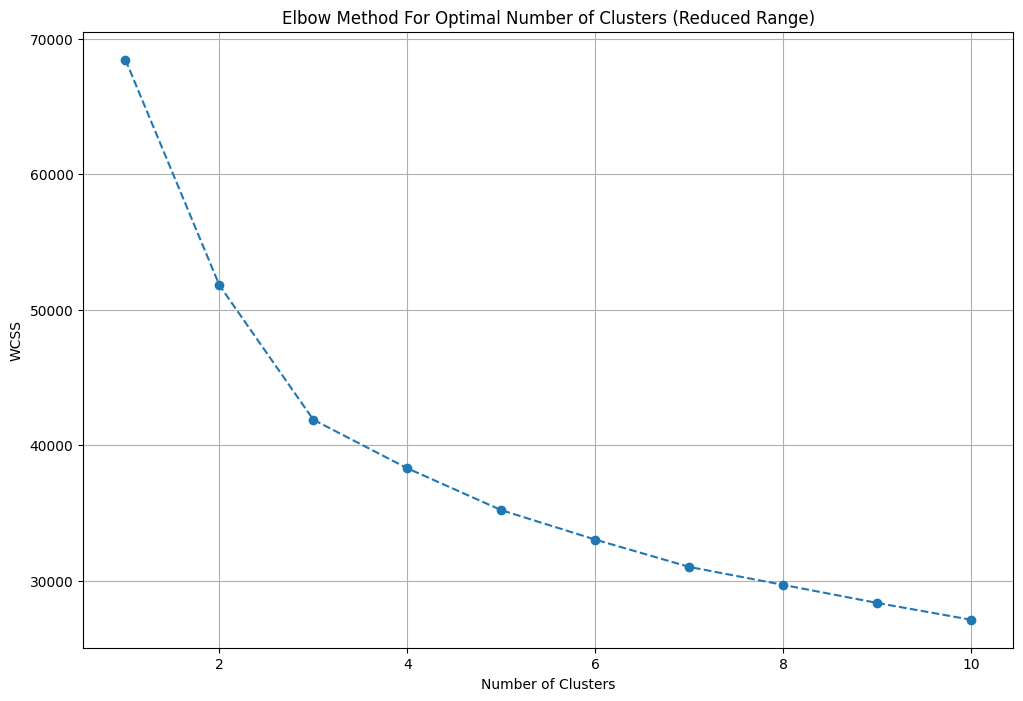

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
df.shape

(3802, 43)

In [48]:
df = df.iloc[:,:-18]

In [49]:
df['furnishing_type'] = cluster_assignments

In [50]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2802,[],0
2060,"['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '1 Modular Kitchen', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
982,[],0
973,"['1 Water Purifier', '1 Fridge', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '6 Light', '1 Modular Kitchen', '1 Chimney', '5 AC', '5 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']",1
2624,NaN,0


## 5.features

In [51]:
df[['society','features']].sample(5)

,society,features
3748,dlf the belaire,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2897,bestech park view ananda,"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Security Personnel', 'Maintenance Staff', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Shopping Centre']"
1489,swarn jayanti cghs,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']"
1829,om appartments,['Visitor Parking']
1935,emaar gurgaon greens,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


In [52]:
df['features'].isnull().sum()

635

In [53]:
import pandas as pd
app_df = pd.read_csv('data_download/apartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [54]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [55]:
temp_df = df[df['features'].isnull()]

In [56]:
temp_df.shape

(635, 26)

In [57]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [58]:
df.loc[temp_df.index,'features'] = x.values

In [59]:
df['features'].isnull().sum()

500

In [60]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [61]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [62]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Billiards,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Toddler Pool,Valet Parking,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1482,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2791,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [63]:
features_binary_df.shape

(3802, 122)

In [64]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

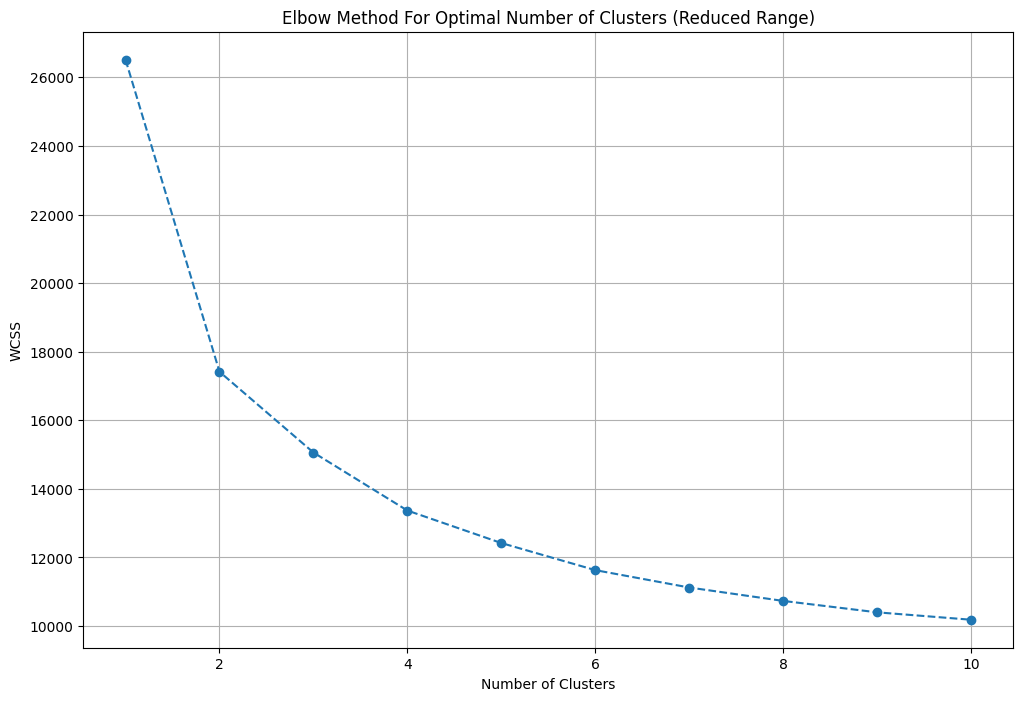

In [65]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [66]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    # 'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    # 'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    # 'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [67]:
df['luxury_score'] = luxury_score

In [68]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,signature global city,sector 92,0.78,7722.0,1010.0,Super Built up area 1010(93.83 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),2,2,3,others,2.0,NaN,Under Construction,"['Iris Broadway Mall', 'Pataudi Road', 'Dwarka Expressway', 'Royal Institute Of Science & Management', 'RPS International School', 'IMT Manesar', 'Aarvy Healthcare Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Sector 90']","['1 Fan', '1 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",1010.0,NaN,700.0,0,0,0,0,1,0,"[Lift(s), Swimming Pool, Park, Fitness Centre / GYM, Club house / Community Center]",24
1,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,servant room,10.0,South-East,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['5 Fan', '5 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",2191.0,NaN,NaN,0,1,0,0,0,0,"[Lift(s), Swimming Pool, Park, Fitness Centre / GYM, Club house / Community Center, Rain Water Harvesting]",31
2,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet area: 3156 sq.ft. (293.2 sq.m.),3,4,3+,"servant room,pooja room",3.0,North-East,Old Property,"['Micromax moulsari avenue metro station', 'Indusind bank cyber city metro station', 'Dlf phase 3 metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Citibank ATM', 'Icici bank ATM', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Garg Dental Care', 'R.N Clinic', 'Shri Ram Memorial Hospital', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Darpan Skin & Mind Clinic', 'DGD Rajokari', 'Relief Physiotherapy Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Cosmodentz Dental Clinic', 'Upkar Clinic', 'Pharmacy', 'Shri Balaji Medical Store', 'SP Infocity', 'PVR Cinames', 'State bank of india', 'Deutsche bank', 'Icici bank', 'Icici bank', 'Standard chartered bank', 'Machaan', 'barrique', 'The God Father', 'Food Court', 'Mc Donalds', ""McDonald's"", 'Cantine', 'Mukesh Dhaba']","['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Modular Kitchen', '5 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'W

In [69]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [70]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2149,flat,signature global park,sohna road,0.775,6404.0,1210.0,Carpet area: 1210 (112.41 sq.m.),3,3,3,1.0,South-East,Relatively New,NaN,NaN,1210.000000,0,0,0,1,0,0,150
1475,flat,mm the marina,sector 68,1.020,8095.0,1260.0,Super Built up area 1260(117.06 sq.m.)Built Up area: 1250 sq.ft. (116.13 sq.m.)Carpet area: 800 sq.ft. (74.32 sq.m.),2,2,2,11.0,North-East,Relatively New,1260.0,1250.0,800.000000,0,0,0,0,1,2,49
291,house,ardee city,sector 52,5.500,183333.0,300.0,Plot area 300(27.87 sq.m.),9,9,3+,3.0,South,Moderately Old,NaN,300.0,NaN,0,1,0,1,1,2,26
2619,flat,aipl club residences,sector 70a,0.850,9139.0,930.0,Super Built up area 930(86.4 sq.m.),2,2,2,5.0,South-East,Relatively New,930.0,NaN,NaN,0,0,0,0,0,2,45
2265,flat,mvn athens,sohna road,0.270,5897.0,458.0,Carpet area: 457.81 (42.53 sq.m.),2,2,1,4.0,South-East,Relatively New,NaN,NaN,457.788667,0,0,0,0,1,2,35


In [71]:
df.shape

(3802, 23)

In [72]:
df.to_csv('data_download/gurgaon_properties_cleaned_v2.csv',index=False)